In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
tickers = ['cfin.jk','tbla.jk', 'bisi.jk']
my_data = pd.DataFrame()
for t in tickers:
    my_data[t] = wb.DataReader(t, "yahoo", start='2009-1-1')['Adj Close']
    
my_data.head()

,cfin.jk,tbla.jk,bisi.jk
Date,,,
2009-01-05,131.869690,150.563339,1666.755737
2009-01-06,150.826782,153.486877,1785.809570
2009-01-07,142.584244,153.486877,1950.022095
2009-01-08,142.584244,153.486877,1847.389282
2009-01-09,142.584244,153.486877,2114.234375


##### Normalization to 100

In [105]:
my_data.iloc[0]

cfin.jk     131.869690
tbla.jk     150.563339
bisi.jk    1666.755737
Name: 2009-01-05 00:00:00, dtype: float64

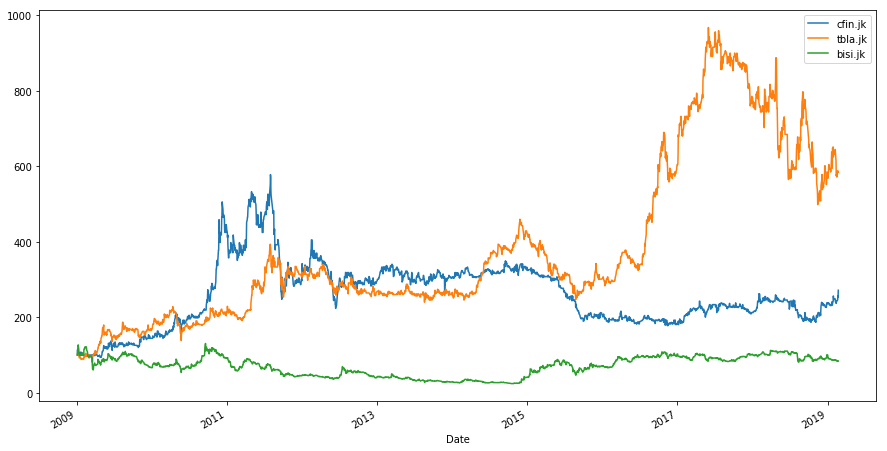

In [106]:
(my_data / my_data.iloc[0] * 100).plot(figsize=(15,8))

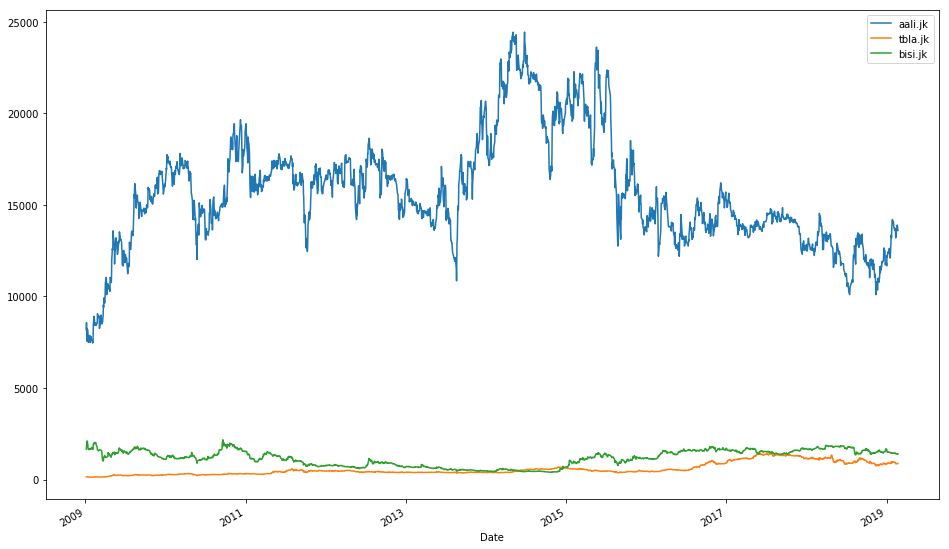

In [72]:
my_data.plot(figsize=(16, 10))

### Calculating the return of portfolio 

In [73]:
returns = (my_data / my_data.shift(1)) -1 
returns.head()

,aali.jk,tbla.jk,bisi.jk
Date,,,
2009-01-05,NaN,NaN,NaN
2009-01-06,0.046812,0.019417,0.071428
2009-01-07,-0.048780,0.000000,0.091954
2009-01-08,-0.072656,0.000000,-0.052632
2009-01-09,0.092171,0.000000,0.144444


In [91]:
weights = np.array([0.10, 0.80, 0.10])


In [92]:
np.dot(returns, weights)

array([        nan,  0.02735787,  0.00431743, ..., -0.00107154,
       -0.00452874, -0.00249936])

In [93]:
annual_returns = returns.mean() * 250 
annual_returns

aali.jk    0.117233
tbla.jk    0.240801
bisi.jk    0.080690
dtype: float64

In [94]:
np.dot(annual_returns, weights)

0.21243317399115258

In [88]:
pfolio1 = str(round(np.dot(annual_returns, weights), 5) * 100) + "%"
pfolio1

'16.988%'

In [95]:
weights2 = np.array([0.05, 0.80, 0.05])

In [96]:
pfolio2 = str(round(np.dot(annual_returns, weights2), 5) * 100) + "%"
pfolio2

'20.254%'